# **Sony WH-1000XM5 headphones: A Data-Driven Dive into User Experiences with Text Analysis**  

**Author: Anh Vi Pham - Henry**  


**Scope:** The project aims to utilize text analysis techniques, including sentiment analysis, bigram analysis, and word cloud generation, to emphasize customers' feedback on the Sony WH1000-XM5 headphones, with the goal of informing and inspiring future innovations.

**Data Source:** The data is collected from Youtube with Youtube API and from Reddit with beautifulsoup, selenium.  

**General Process:**  
1. General view with WordCloud:  

    a. Youtube video titles and comments  
    b. Reddit posts and comments  
    
2. Customer's experience with Sentiment Analysis and Bigrams  

    a. General view from Reddit and Youtube users  
    b. Positive comments analysis  
    c. Negative comments analysis  

3. Summary of user experiences on Sony WH1000-XM5  

4. Recommendations for innovations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("punkt")
nltk.download("webtext")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/MacbookAir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/MacbookAir/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MacbookAir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import data

In [2]:
df_redpos = pd.read_csv('reddit.csv', index_col=0)

df_redpos['title'] = df_redpos['title'].str.lower()

ind_xm5 = []
for ind, ele in enumerate(df_redpos['title']):
    if 'xm5' in ele:
        ind_xm5.append(ind)

df_redpos = df_redpos.iloc[ind_xm5]
df_redpos

,title,author,comments,likes,link
1,sony xm5 noise cancellation problem,imtiagoo,2,2,/r/sony/comments/169dyda/sony_xm5_noise_cancel...
2,sony xm5 charging issue,Lazy_Incident4974,1,2,/r/sony/comments/169cw9l/sony_xm5_charging_issue/
5,is it worth buying the wf-1000xm5?,TGP777,3,4,/r/sony/comments/16904pd/is_it_worth_buying_th...
18,noice cancelling on the wh-1000xm5's aren't li...,Old_Beyond_8485,6,2,/r/sony/comments/1682r61/noice_cancelling_on_t...
30,"wf-1000xm5s with spinfit cp360, no gauze?",Omnipresent_Walrus,6,3,/r/sony/comments/1677e9j/wf1000xm5s_with_spinf...
...,...,...,...,...,...
3962,wh-1000xm5 volume is being lowered automatically?,xxwlcd_,1,2,/r/sony/comments/14rn65s/wh1000xm5_volume_is_b...
3976,wh1000xm5 how to unactivate end call gesture,testonslou,1,1,/r/sony/comments/14rzhpe/wh1000xm5_how_to_unac...
3982,wh-1000xm5 volume is being lowered automatically?,xxwlcd_,1,2,/r/sony/comments/14rn65s/wh1000xm5_volume_is_b...
3996,wh1000xm5 how to unactivate end call gesture,testonslou,1,1,/r/sony/comments/14rzhpe/wh1000xm5_how_to_unac...


In [3]:
df_redcom = pd.read_csv('reddit_comments.csv', index_col=0)
df_redcom

df_redcom['comment'] = df_redcom['comment'].str.lower()

ind_xm5 = []
for ind, ele in enumerate(df_redcom['comment']):
    if 'xm5' in ele:
        ind_xm5.append(ind)

df_redcom = df_redcom.iloc[ind_xm5]
df_redcom

,comment
4,recently i bought the sony xm5 headphones and ...
17,i have since about two years back owned a pair...
19,it's not a general sony thing as far as i can ...
59,so is 2.0.2 update safe for sony whxm5? wont i...
67,"i've had the xm5's for a week now, and don't g..."
...,...
3147,i struggle with my motor skills. i struggled s...
3164,"i'm on android, but in my experience, the app ..."
3187,my experience with wh-1000xm4:\ni own a pair o...
3191,xm4's where amazing until they started whistli...


In [4]:
df_youcom = pd.read_csv('youtube_comments.csv', index_col = 0)
df_youcom

,videoId,comment,author
0,6CsJZxfZsL0,You are doing God’s work my man. Thanks for wh...,undyingforce
1,6CsJZxfZsL0,"I would get the mark 4, but the mark 5 is on a...",Ali Uraidhi Assagaf
2,6CsJZxfZsL0,Anyones suggestions please reply. Im stuck bet...,Fume
3,6CsJZxfZsL0,i have xm4s and xm5s and spent less than what ...,aaron
4,6CsJZxfZsL0,i see what your saying but the same thing that...,aaron
...,...,...,...
890,VGaV_YJhWqo,Does anybody know if any of those software iss...,Ignas Januskevicius
891,VGaV_YJhWqo,Interesting review. Just goes to show how indi...,AB-80X
892,VGaV_YJhWqo,"Personally, the biggest issue I've had with So...",Samu
893,VGaV_YJhWqo,Sound is so subjective; saying they sound bett...,nick albano


In [5]:
df_youvid = pd.read_csv('youtube_videos.csv', index_col = 0)
df_youvid.head(5)

,id,channel,publishedAt,title,description,views,likes,dislikes
0,6CsJZxfZsL0,Marques Brownlee,2022-05-12 16:01:05+00:00,"Sony WH-1000XM5 Review: Two Steps Forward, One...",Sony's MK5 noise cancelling headphones are sti...,4898209.0,166456.0,0.0
1,v6EjmbMgv80,Sony - Global,2022-05-12 16:00:27+00:00,Sony Noise Cancelling Headphones WH-1000XM5 Of...,YOUR WORLD. NOTHING ELSE. See how the WH-1000X...,927870.0,22788.0,0.0
2,dEHYA-jACoU,6 Months Later,2022-11-21 15:30:15+00:00,Sony WH-1000XM5 Headphones Review - 6 Months L...,The Sony WH-1000XM5s are one of the best Blue...,79254.0,890.0,0.0
3,BdvOuKTi3CE,Digital Trends,2022-05-18 14:15:01+00:00,Sony WH-1000XM5 vs. WH-1000XM4 | Time to upgrade?,"For now, the Sony WH-1000XM5 do not replace th...",577010.0,13239.0,0.0
4,zolOnpuOHaA,ShortCircuit,2022-05-12 21:15:42+00:00,I've been SPOILED! - Sony WH-1000XM5,"If you're reading this, you probably missed yo...",1661202.0,46728.0,0.0


# **1. A general view with Word Cloud**

In [6]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import re

import wordcloud
import matplotlib.pyplot as plt

In [7]:
# setup stop words
ignored_words = set(stopwords.words("english"))

ignored_words.add("should")
ignored_words.add("get")

### a. Youtube video titles and comments Word Cloud

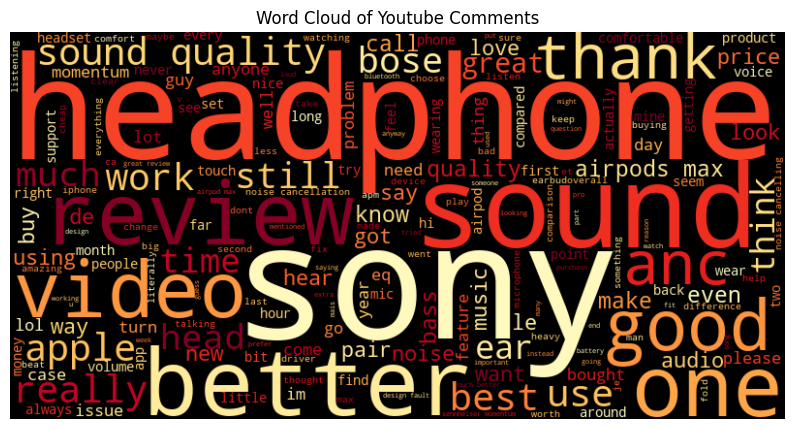

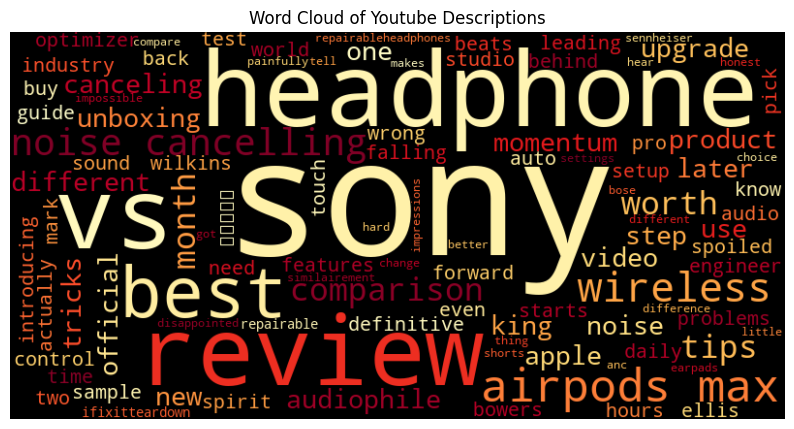

In [8]:
# WORDCLOUD FOR YOUTUBE COMMENTS
tokens = []
for description in df_youcom["comment"]:
    description = description.lower()
    description = re.sub("https?:\/\/\S+", "", description)  # Remove links (parts starting with http)
    for token in word_tokenize(description):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
s = " ".join(tokens)  # Means using a space " " to join "tokens".

wc = wordcloud.WordCloud(width=800, height=400, background_color='black', colormap='YlOrRd').generate(s)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Youtube Comments')
plt.show()

# WORDCLOUD FOR YOUTUBE VIDEO TITLE
tokens = []
for description in df_youvid["title"]:
    description = description.lower()
    description = re.sub("https?:\/\/\S+", "", description)  # Remove links (parts starting with http)
    for token in word_tokenize(description):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
s = " ".join(tokens)  # Means using a space " " to join "tokens".

wc = wordcloud.WordCloud(width=800, height=400, background_color='black', colormap='YlOrRd').generate(s)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Youtube Descriptions')
plt.show()

Keywords:
- review
- best
- wireless
- canceling
- tricks
- unboxing

With Figure 1 and Figure 2, we can get a preliminary understanding of the keywords in the descriptions of YouTube videos and the comments on those videos. The YouTube platform often contains content related to product reviews. Therefore, keywords in the comments tend to be quite positive, such as "better," "good," "thank," and so on. In the video descriptions, keywords reflect the types of content that YouTubers typically create for tech-related products, such as product reviews ("review," "audiophile," "noise cancelling"), product guides ("tips," "tricks"), and product comparisons ("VS," "different," "comparison").

### b. Reddit posts and comments

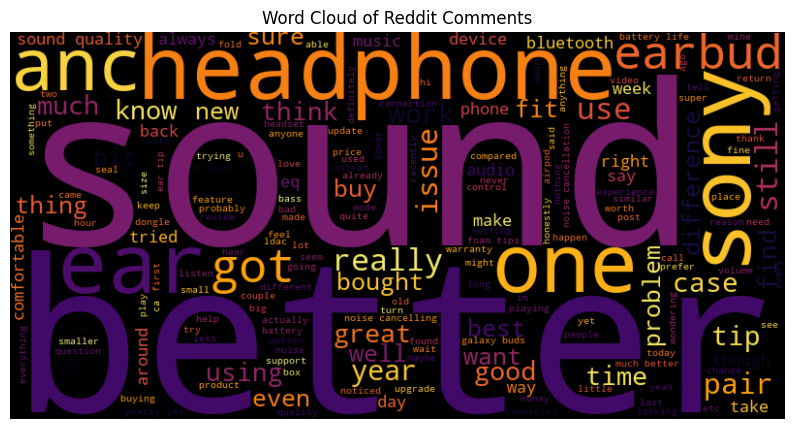

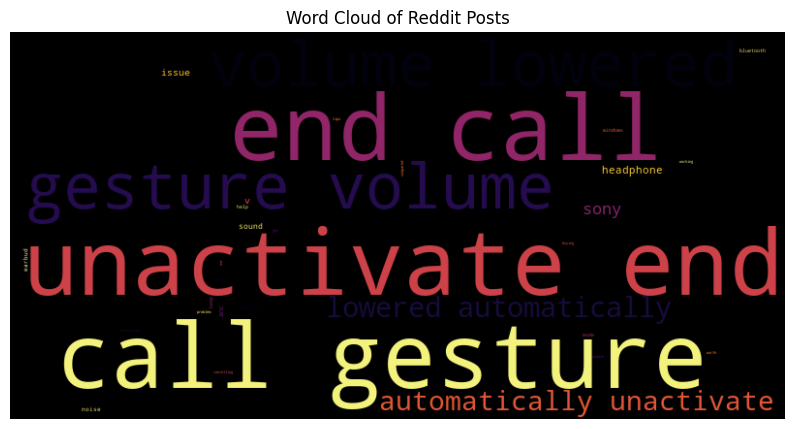

In [9]:
# WORDCLOUD FOR REDDIT COMMENTS
tokens = []
for description in df_redcom["comment"]:
    description = description.lower()
    description = re.sub("https?:\/\/\S+", "", description)  # Remove links (parts starting with http)
    for token in word_tokenize(description):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
s = " ".join(tokens)  # Means using a space " " to join "tokens".

wc = wordcloud.WordCloud(width=800, height=400, background_color='black', colormap='inferno').generate(s)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Reddit Comments')
plt.show()

# WORDCLOUD FOR REDDIT POSTS
tokens = []
for description in df_redpos["title"]:
    description = description.lower()
    description = re.sub("https?:\/\/\S+", "", description)  # Remove links (parts starting with http)
    for token in word_tokenize(description):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
s = " ".join(tokens)  # Means using a space " " to join "tokens".

wc = wordcloud.WordCloud(width=800, height=400, background_color='black', colormap='inferno').generate(s)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Reddit Posts')
plt.show()

Keywords:
- issue 
- earbud 
- unactivate end 
- gesture 
- volume lowered 
- end call

In contrast to YouTube, Figure 2 and Figure 3 indicate a somewhat negative sentiment on Reddit, where discussions tend to be more vibrant, especially regarding product-related issues. Although the overall sentiment about the product remains generally positive, some keywords immediately bring up product issues, such as "issue," "end call," "volume lowered," or "automatically unactivate."

# 3. Customer's experience with Sentiment Analysis

In [10]:
from textblob import TextBlob

from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from collections import Counter
import re

import networkx as nx
plt.style.use("seaborn")

/var/folders/rq/kt0_4dp51fz3lbt5hp9__tl80000gp/T/ipykernel_59367/3678147832.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


### a. General view from Reddit and Youtube users

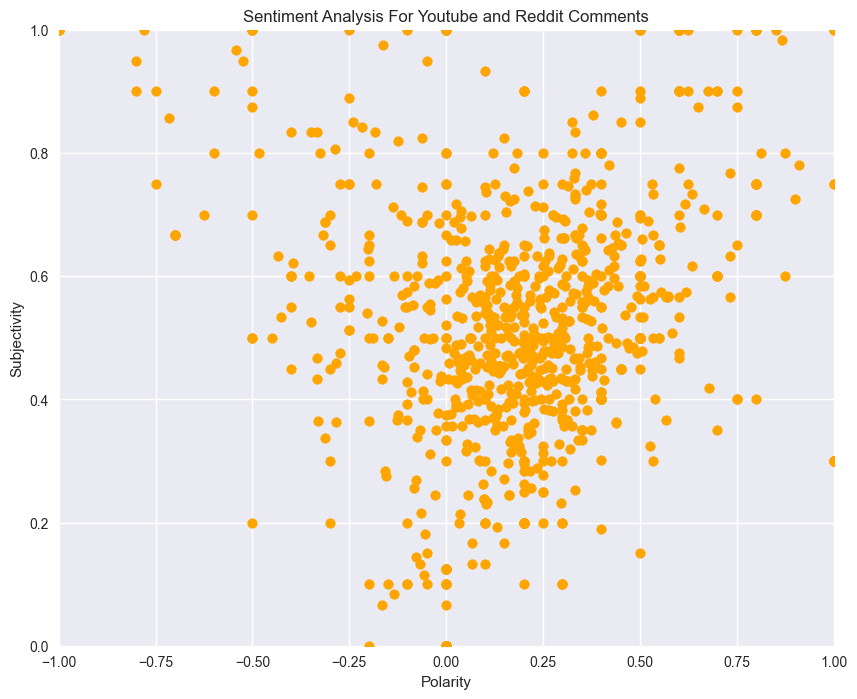

In [11]:
# YOUTUBE SENTIMENT ANALYSIS
subjectivity_list = []
polarity_list = []
for full_text in df_youcom["comment"]:
    tb = TextBlob(full_text)
    subjectivity_list.append(tb.sentiment.subjectivity)
    polarity_list.append(tb.sentiment.polarity)
df_youcom["subjectivity"] = subjectivity_list
df_youcom["polarity"] = polarity_list
df_redcom.head()


# REDDIT SENTIMENT ANALYSIS
subjectivity_list = []
polarity_list = []
for full_text in df_redcom["comment"]:
    tb = TextBlob(full_text)
    subjectivity_list.append(tb.sentiment.subjectivity)
    polarity_list.append(tb.sentiment.polarity)
df_redcom["subjectivity"] = subjectivity_list
df_redcom["polarity"] = polarity_list
df_redcom.head()


# MERGING DATASETS
# reddit
df_redcom_sen = df_redcom[['comment','subjectivity','polarity']]
# youtube
df_youcom_sen = df_youcom[['comment','subjectivity','polarity']]
df_sentiment  = pd.concat([df_redcom_sen,df_youcom_sen], axis=0)



plt.figure(figsize=(10, 8))
plt.scatter(df_sentiment.polarity, df_sentiment.subjectivity, color='orange')
plt.xlabel("Polarity")
plt.xlim((-1, 1))
plt.ylabel("Subjectivity")
plt.ylim((0, 1))
plt.title('Sentiment Analysis For Youtube and Reddit Comments')
plt.show()

To gather customer opinions, Sentiment Analysis techniques have been applied in this analysis. Data collected from both platforms have been combined to facilitate the analysis process.  

Overall, while many customer reviews may not be highly objective, the level of satisfaction among users is relatively positive. From here, the data will be divided into two groups for analysis: positive reviews and negative reviews.

### b. Postive comment analysis

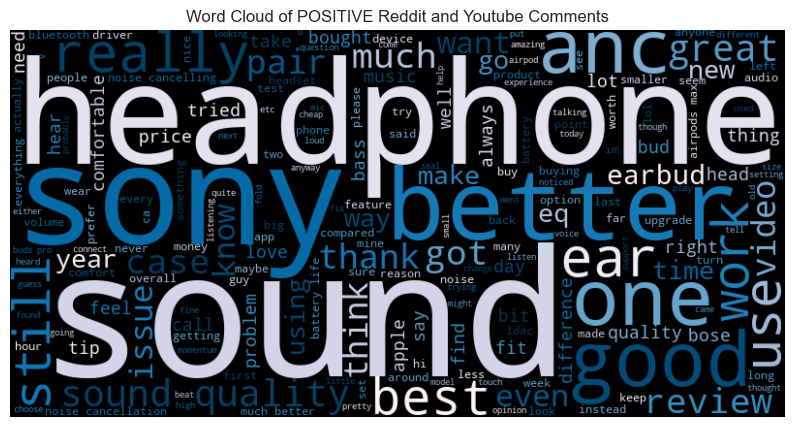

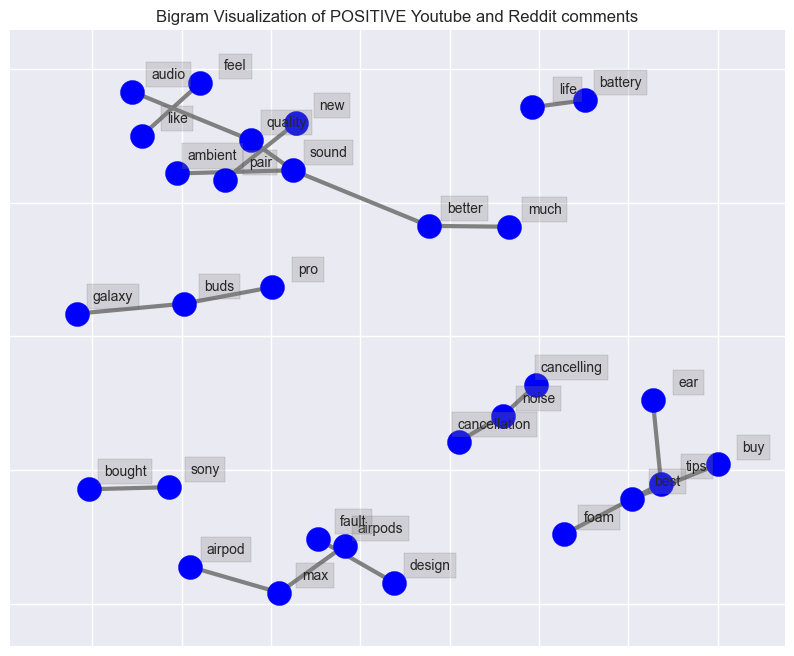

In [12]:
df_redcom_pos = df_redcom[df_redcom.polarity>0]
df_redcom_pos = df_redcom_pos[['comment','subjectivity','polarity']]

df_youcom_pos = df_youcom[df_youcom.polarity>0]
df_youcom_pos = df_youcom_pos[['comment','subjectivity','polarity']]

df_pos  = pd.concat([df_redcom_pos,df_youcom_pos], axis=0)


# WORDCLOUD
tokens = []
for description in df_pos["comment"]:
    description = description.lower()
    description = re.sub("https?:\/\/\S+", "", description)  # Remove links (parts starting with http)
    for token in word_tokenize(description):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
s = " ".join(tokens)  # Means using a space " " to join "tokens".

wc = wordcloud.WordCloud(width=800, height=400, background_color='black', colormap='PuBu').generate(s)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of POSITIVE Reddit and Youtube Comments')
plt.show()


# BIGRAM
pos_comments = []
ignored_words = set(stopwords.words("english"))

for full_text in df_pos["comment"]:
    full_text = full_text.lower()
    full_text = re.sub("@[A-Za-z0–9]+", "", full_text)  # Removing @mentions
    full_text = re.sub("#", "", full_text)  # Removing '#' hash tag
    full_text = re.sub("rt[\s]+", "", full_text)  # Removing RT
    full_text = re.sub("https?:\/\/\S+", "", full_text)  # Removing hyperlinks
    tokens = []
    for token in word_tokenize(full_text):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
    pos_comments.append(tokens)
bigrams_list = []
for t in pos_comments:
    bigrams_list.extend(list(bigrams(t)))

bigrams_freq = Counter(bigrams_list)

G = nx.Graph()
for b, freq in bigrams_freq.most_common(20):  # b is the tuple of a bigram; freq is the number.
    G.add_edge(b[0], b[1], weight=freq)  # b[0] is the first word; b[1] is the second.
plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color="grey",
                 node_color="blue",
                 with_labels=False)  # We hide the bulit-in labels here because we will draw them next.

# Create offset labels.
for key, value in pos.items():
    x, y = value[0] + 0.1, value[1] + 0.05
    plt.text(x, y, s=key,
             bbox=dict(facecolor="grey", alpha=0.25),
             horizontalalignment="center", fontsize=10)
plt.title('Bigram Visualization of POSITIVE Youtube and Reddit comments')
plt.show()


Keywords with a positive sentiment such as "good" and "comfortable" have appeared in association with features of the Sony WH-1000XM5, such as "ANC" (Active Noise Canceling) and "earbud."  

Using Bigram analysis, we can easily grasp the context of positive reviews. It can be said that the WH-1000XM5 headphones have performed very well in terms of sound quality, and the noise-canceling capability of ANC is highly effective. Additionally, the ear tips of the headphones provide a comfortable experience for users.


### c. Negative comments Analysis

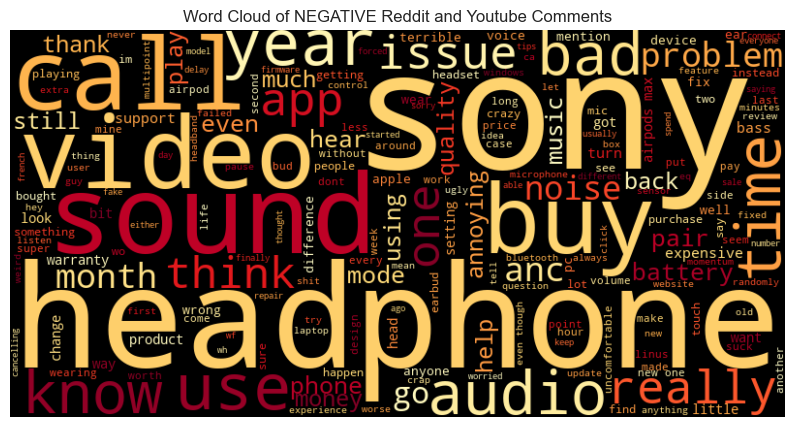

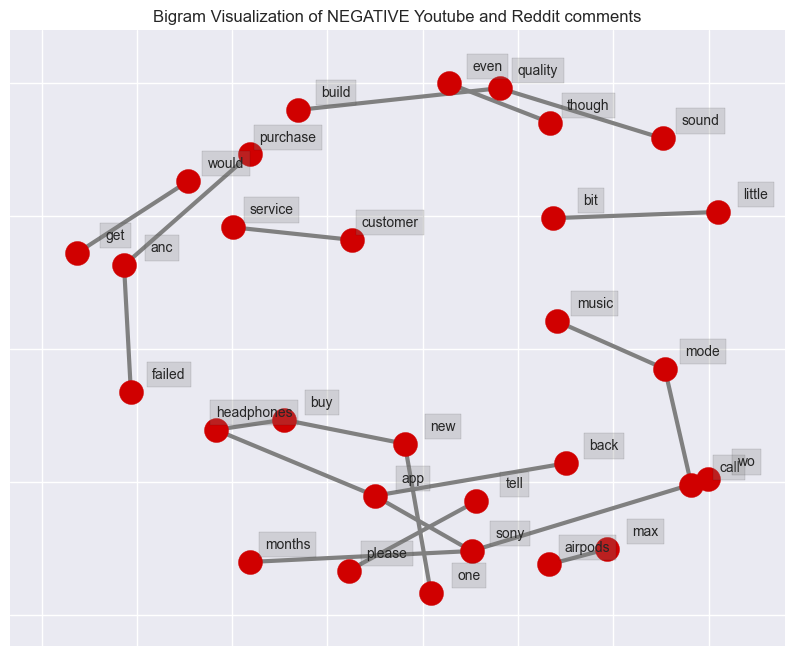

In [13]:
df_redcom_neg = df_redcom[df_redcom.polarity<0]
df_redcom_neg = df_redcom_neg[['comment','subjectivity','polarity']]

df_youcom_neg = df_youcom[df_youcom.polarity<0]
df_youcom_neg = df_youcom_neg[['comment','subjectivity','polarity']]

df_neg  = pd.concat([df_redcom_neg,df_youcom_neg], axis=0)

# WORDCLOUD
tokens = []
for description in df_neg["comment"]:
    description = description.lower()
    description = re.sub("https?:\/\/\S+", "", description)  # Remove links (parts starting with http)
    for token in word_tokenize(description):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
s = " ".join(tokens)  # Means using a space " " to join "tokens".

wc = wordcloud.WordCloud(width=800, height=400, background_color='black', colormap='YlOrRd').generate(s)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of NEGATIVE Reddit and Youtube Comments')
plt.show()

# BIGRAM
neg_comments = []
ignored_words = set(stopwords.words("english"))

for full_text in df_neg["comment"]:
    full_text = full_text.lower()
    full_text = re.sub("@[A-Za-z0–9]+", "", full_text)  # Removing @mentions
    full_text = re.sub("#", "", full_text)  # Removing '#' hash tag
    full_text = re.sub("rt[\s]+", "", full_text)  # Removing RT
    full_text = re.sub("https?:\/\/\S+", "", full_text)  # Removing hyperlinks
    tokens = []
    for token in word_tokenize(full_text):
        if token.isalpha() and token not in ignored_words:  # Stop words removal
            tokens.append(token)
    neg_comments.append(tokens)
bigrams_list = []
for t in neg_comments:
    bigrams_list.extend(list(bigrams(t)))

bigrams_freq = Counter(bigrams_list)

G = nx.Graph()
for b, freq in bigrams_freq.most_common(20):  # b is the tuple of a bigram; freq is the number.
    G.add_edge(b[0], b[1], weight=freq)  # b[0] is the first word; b[1] is the second.
plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color="grey",
                 node_color="#d00000",
                 with_labels=False)  # We hide the bulit-in labels here because we will draw them next.

# Create offset labels.
for key, value in pos.items():
    x, y = value[0] + 0.1, value[1] + 0.05
    plt.text(x, y, s=key,
             bbox=dict(facecolor="grey", alpha=0.25),
             horizontalalignment="center", fontsize=10)
plt.title('Bigram Visualization of NEGATIVE Youtube and Reddit comments')
plt.show()

Looking at the wordcloud, which examines negative comments, notable keywords are related to the headphone's usage time, such as "time" and "battery." Issues regarding call quality and operations are evident through keywords like "video" and "call." Remarkably, "ANC" appears again in negative reviews, this time accompanied by the word "failed".

# 3. Summary of user experiences on Sony WH1000-XM5  


Advantages:  

- Exceptional sound quality.
- Ergonomically designed foam ear tips enhance user comfort.
- Robust Active Noise Canceling (ANC) technology delivers a tranquil listening experience.   

Limitations:
- Insufficient battery life, resulting in limited usage when the Active Noise Canceling feature is
activated.
- Inconsistent performance of the Active Noise Canceling feature.
- Subpar call quality, including inadequate microphone audio capture.
- Inaccurate touch controls on the headphones, leading to unintended automatic volume
adjustments and call terminations.  

Hence, to enhance the next-generation product, it is imperative not only to preserve its strengths but also to rectify the identified weaknesses.

# 4. Recommendations for innovations

a. Innovation in Battery Management:
- Develop advanced battery technology to enhance the usage time when using the Active Noise Canceling (ANC) feature.
- Integrate intelligent power-saving modes to optimize battery usage in necessary situations.  

b. Enhancing ANC Stability:
- Utilize improved sensors and algorithms to ensure the stability of the Active Noise Canceling (ANC) feature, effectively eliminating noise without causing disruptions to users.  

c. Improving Call Quality and Microphone Audio:
- Implement advanced microphone and audio recording technology to enhance call quality, ensuring clear and noise-free audio capture.
- Incorporate noise reduction technology to eliminate wind and environmental noise during calls.   

d. Optimizing Touch Controls:
- Utilize enhanced touch sensors to improve the accuracy of touch-based controls, preventing inaccuracies in volume adjustments and automatic call termination. 
- Integrate customizable touch control options, allowing users to personalize their preferences.



# Thank you for reading
I sincerely appreciate your time in following and reading the results of this analysis. If you have any questions, opinions, or would like to share your thoughts, I warmly welcome and are open to receiving them.  
To get in touch with me or to obtain more detailed information, please use the following means:  

Email: anhvi09042002@gmail.com  

LinkedIn: https://www.linkedin.com/in/anh-vi-pham/  

Github: https://github.com/anhvi02

Kaggle: https://www.kaggle.com/nobit02  

I highly value all contributions and feedback, and will endeavor to respond at the earliest opportunity. Thank you once again, and I look forward to hearing from you!